# Baseball Case Study

Baseball Case Study
Problem Statement
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

Output: Number of predicted wins (W)

# Attribute Information:-

W -- WIN (Target Variable)

R – Runs scored: times reached home plate legally and safely.

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

H – Hit: reaching base because of a batted, fair ball without error by the defense.

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error.

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error.

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.

BB -- Walks

SO (Strike out) : number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.

SB – Stolen base: number of bases advanced by the runner while the ball is in the posse.

RA -- Runs Allowed.

ER – Earned run: number of runs that did not occur as a result of errors or passed ballsssion of the defense.

ERA+ – Adjusted ERA+: earned run average adjusted for the ballpark and the league average.

SHO – Shutout: number of complete games pitched with no runs allowed.

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

HR (or HRA) – Home runs allowed: total home runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Exploratory Data Analysis (EDA):

In [5]:
##checking the shape
df.shape

(30, 17)

Dataset contains 30 rows and 17 columns

In [7]:
#checking data dtypes


W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

all the columns in the data are int except ERA,which is float type

In [8]:
#Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
#checking null values in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in dataset

<AxesSubplot:>

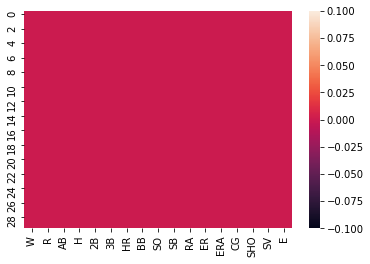

In [10]:
#visualize the null values
sns.heatmap(df.isnull())

NO null values present in the dataset

In [11]:
#checking for unique values in dataset
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In every column,unique values are presnt.

In [12]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Now for Target variable:

In [15]:
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

Many unique values in Target variable

In [16]:
df['W'].value_counts()

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

# Statistics of Dataset:

In [17]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

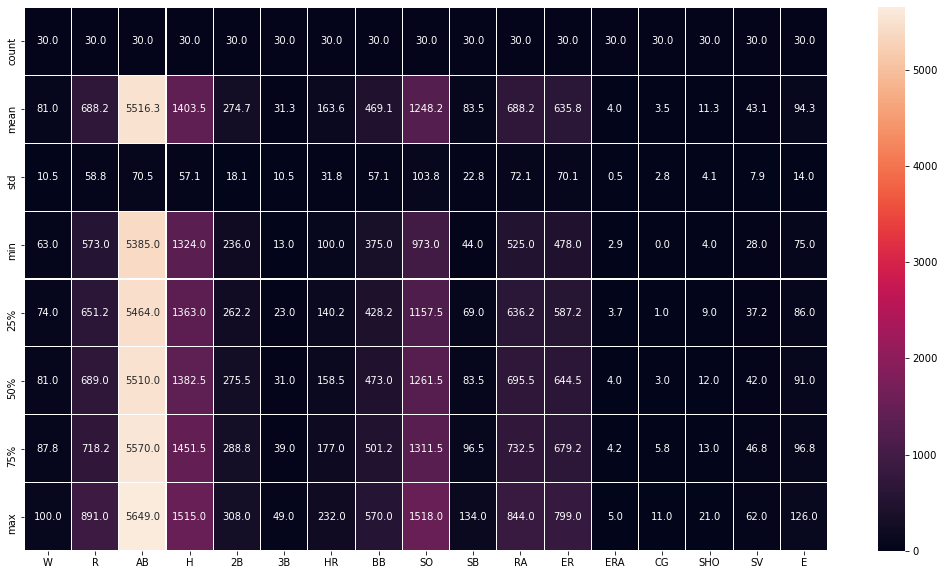

In [18]:
plt.figure(figsize=(18,10))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)

# Data Visualization:-

<AxesSubplot:>

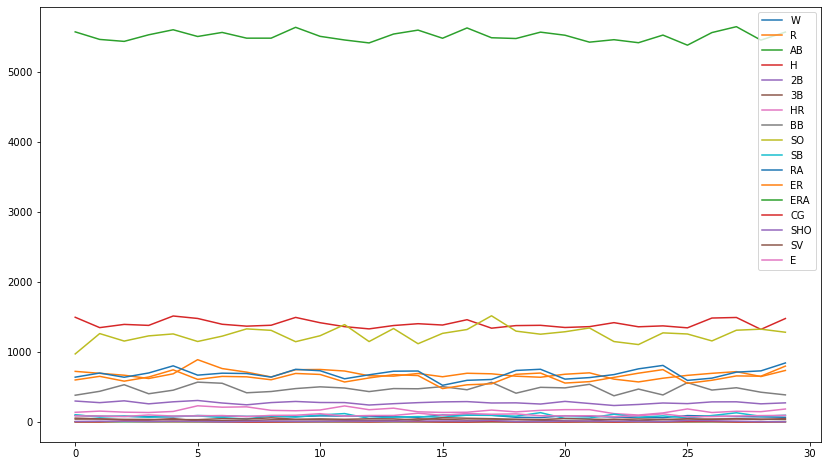

In [25]:
df.plot.line(figsize=(14,8))

#### AB (at bat) has highest numbers.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

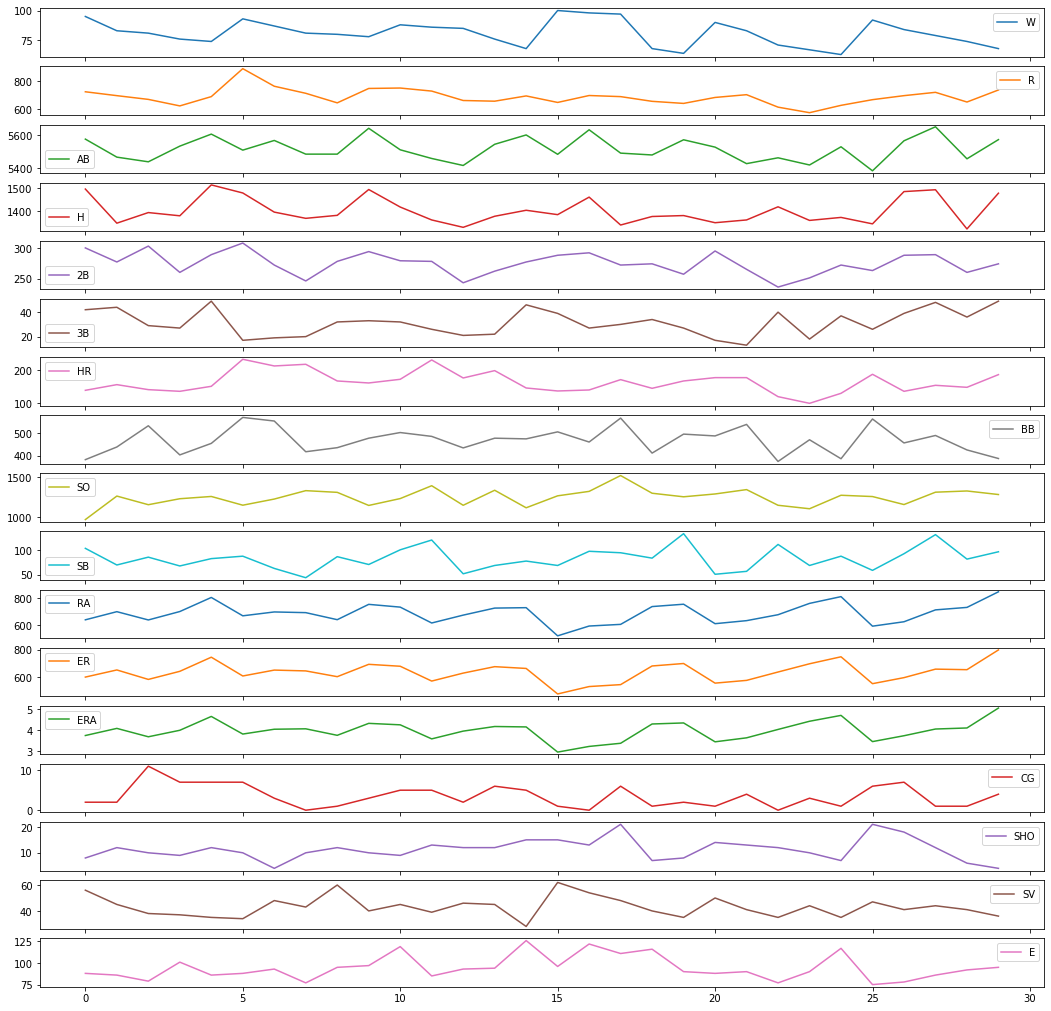

In [27]:
df.plot.line(subplots =True, figsize=(18,18))

#### Distribution of Data

<AxesSubplot:xlabel='W', ylabel='Count'>

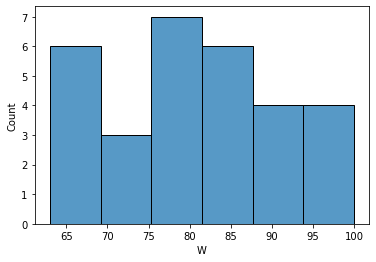

In [28]:
#for Target variable
sns.histplot(df['W'])

#### Data in TARGET variable is normally distributed

<AxesSubplot:xlabel='W', ylabel='Density'>

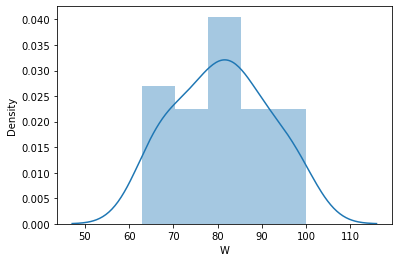

In [35]:
sns.distplot(df['W'])

The target column 'W'(wins) looks normally distributed and also we can observe there is no skewness. So from the graph it is clear that the winning rate is between 63 to 100.

<AxesSubplot:xlabel='R', ylabel='Density'>

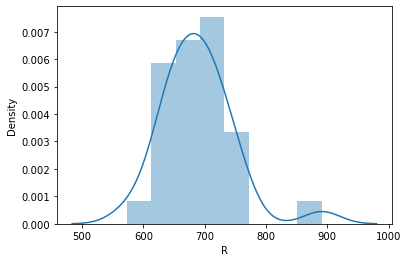

In [37]:
sns.distplot(df['R'])

Data is not normally distributed.So from the graph it is clear that therun rate is between 570 to 890.

<AxesSubplot:xlabel='AB', ylabel='Density'>

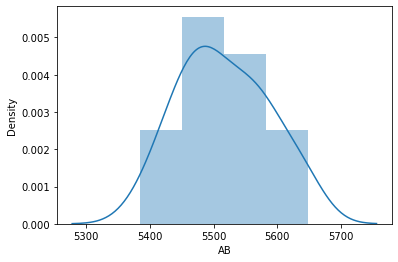

In [38]:
sns.distplot(df['AB'])

AB'(At Bats) looks normally distributed

<AxesSubplot:xlabel='H', ylabel='Density'>

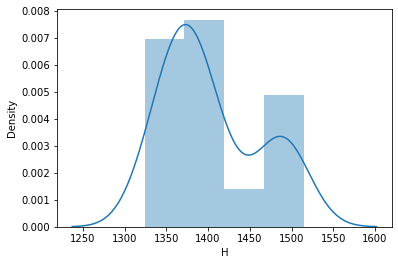

In [40]:
sns.distplot(df['H'])

'H' Data is not normally distributed

<AxesSubplot:xlabel='2B', ylabel='Density'>

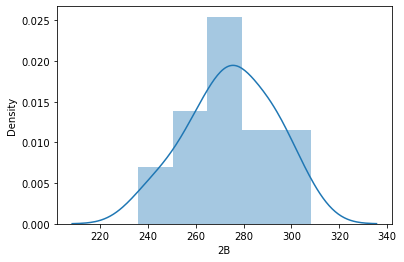

In [55]:
sns.distplot(df['2B'])

'2B data looks normally distributed'

<AxesSubplot:xlabel='3B', ylabel='Density'>

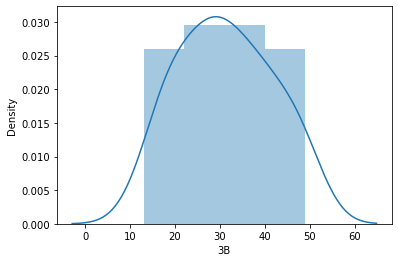

In [42]:
sns.distplot(df['3B'])

'3b' data looks normally distributed

<AxesSubplot:xlabel='HR', ylabel='Density'>

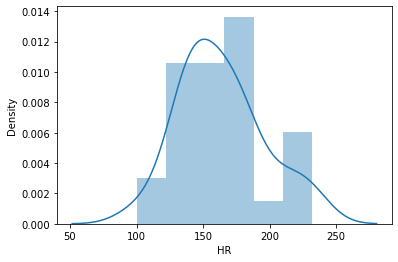

In [43]:
sns.distplot(df['HR'])

'HR' data is not normally distributed

<AxesSubplot:xlabel='BB', ylabel='Density'>

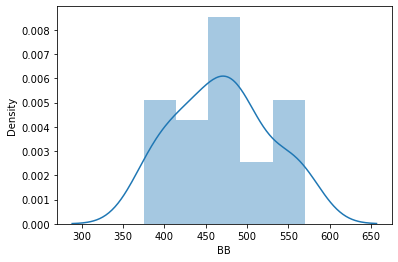

In [44]:
sns.distplot(df['BB'])

'BB' data is not normally distributed

<AxesSubplot:xlabel='SO', ylabel='Density'>

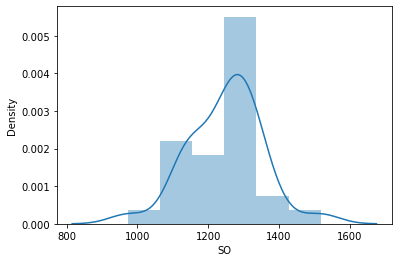

In [45]:
sns.distplot(df['SO'])

'SO' data is not normally distributed

<AxesSubplot:xlabel='SB', ylabel='Density'>

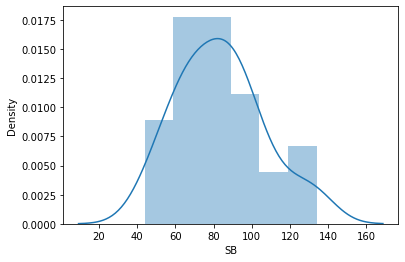

In [46]:
sns.distplot(df['SB'])

'SB' data is normally distributed

<AxesSubplot:xlabel='RA', ylabel='Density'>

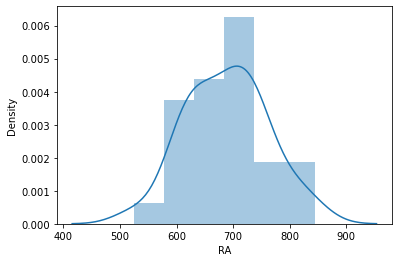

In [47]:
sns.distplot(df['RA'])

'RA' data is not normally distributed

<AxesSubplot:xlabel='ER', ylabel='Density'>

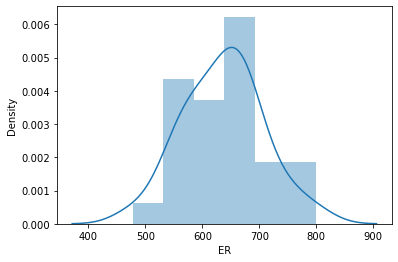

In [48]:
sns.distplot(df['ER'])

 'ER'(Earned Runs) is normal 

<AxesSubplot:xlabel='ERA', ylabel='Density'>

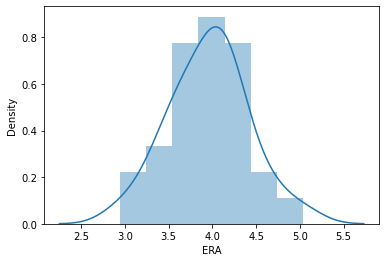

In [49]:
sns.distplot(df['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Density'>

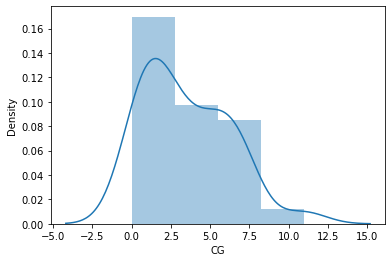

In [50]:
sns.distplot(df['CG'])

CG is normal Distributed

<AxesSubplot:xlabel='SHO', ylabel='Density'>

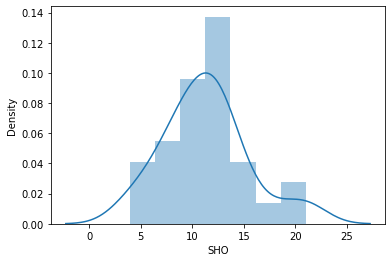

In [51]:
sns.distplot(df['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

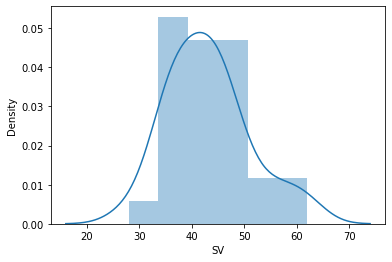

In [52]:
sns.distplot(df['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

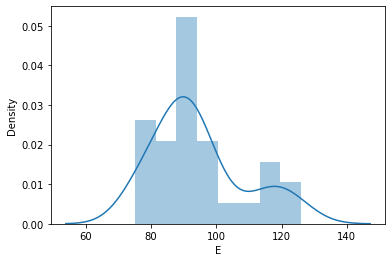

In [53]:
sns.distplot(df['E'])

E'(errors) data are not normally distributed

# Checking Outliers:

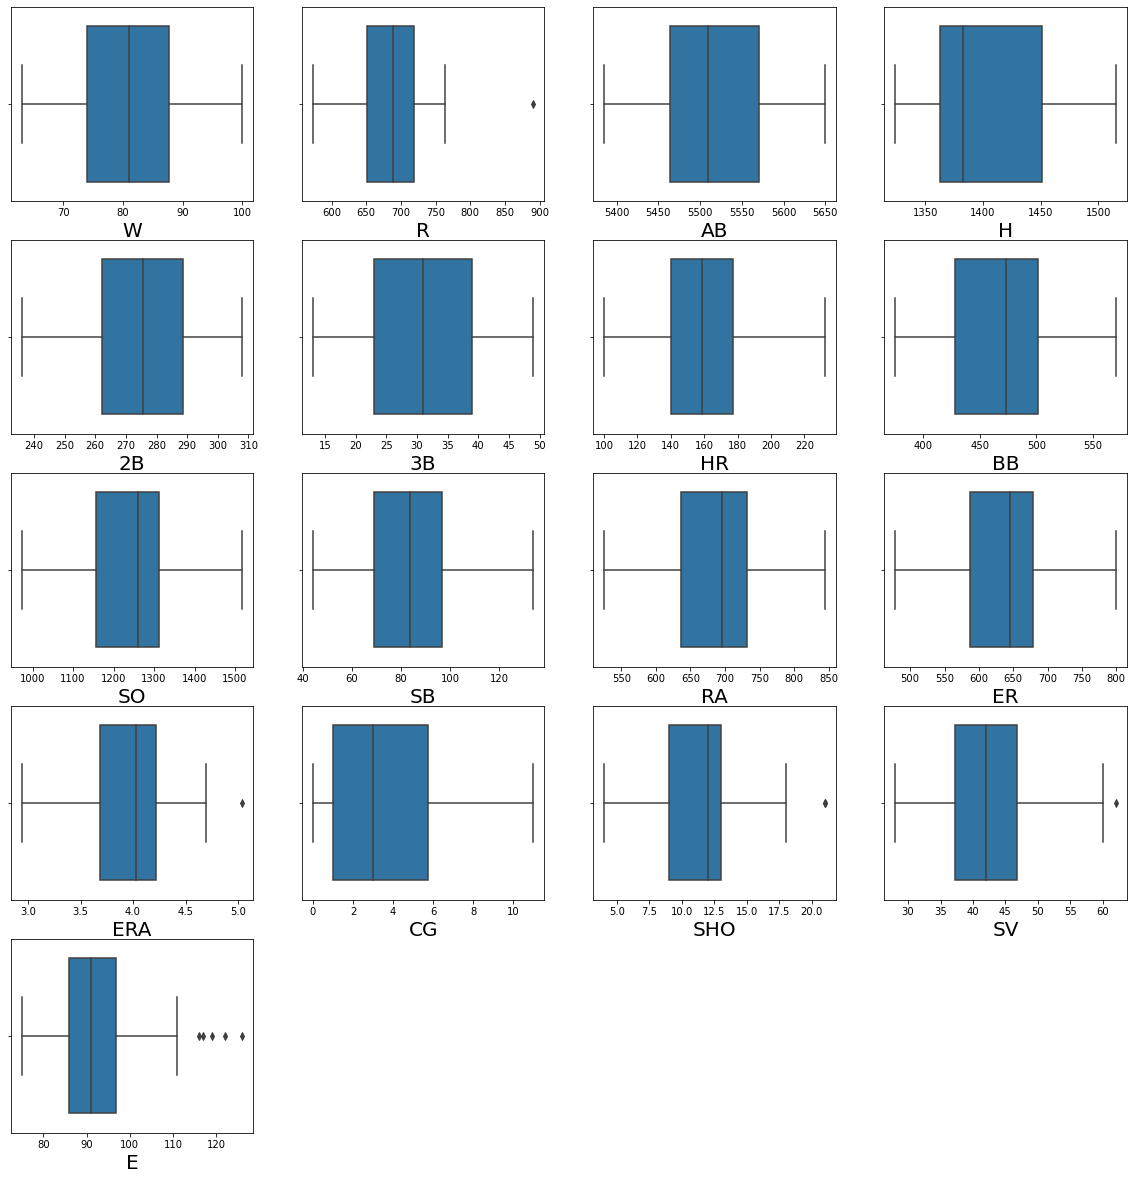

In [57]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### we can observe the outliers are present in the columns 'R', 'ERA', 'SHO', 'SV', and 'E'.

<AxesSubplot:title={'center':'Relation between Runs and Hits'}, xlabel='R', ylabel='H'>

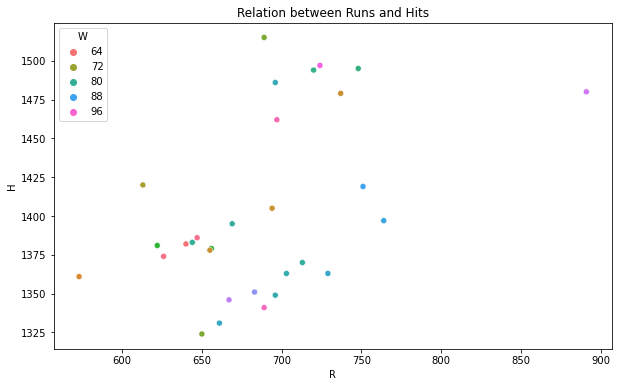

In [63]:
#relation between two variables.
plt.figure(figsize=[10,6])
plt.title('Relation between Runs and Hits')
sns.scatterplot(df['R'],df['H'],hue=df["W"],palette="husl")

<AxesSubplot:title={'center':'Relation between AB and Hits'}, xlabel='AB', ylabel='H'>

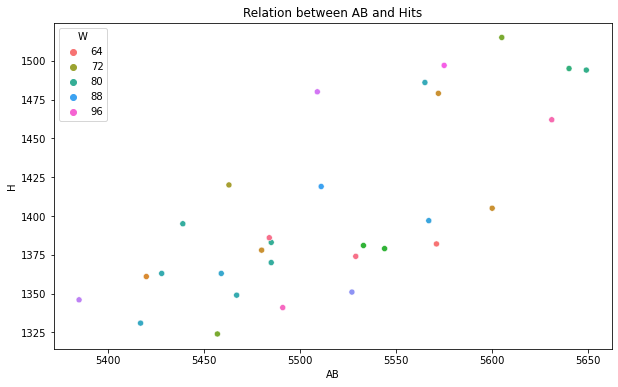

In [64]:
plt.figure(figsize=[10,6])
plt.title('Relation between AB and Hits')
sns.scatterplot(df['AB'],df['H'],hue=df["W"],palette="husl")

<AxesSubplot:title={'center':'Relation between Runs and Errors'}, xlabel='R', ylabel='E'>

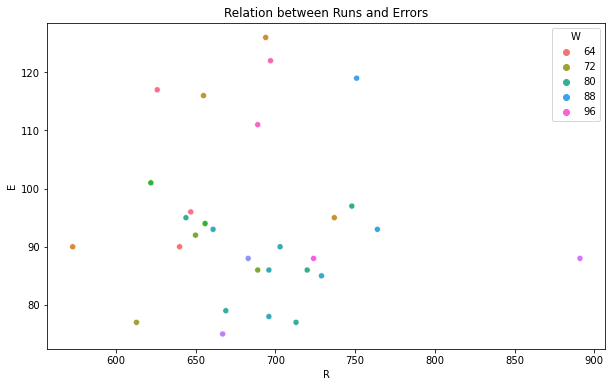

In [65]:
plt.figure(figsize=[10,6])
plt.title('Relation between Runs and Errors')
sns.scatterplot(df['R'],df['E'],hue=df["W"],palette="husl")

<AxesSubplot:title={'center':'Relation between RA and ERA'}, xlabel='RA', ylabel='ERA'>

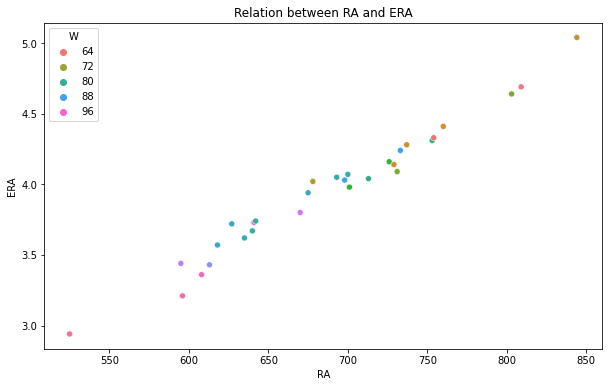

In [66]:
plt.figure(figsize=[10,6])
plt.title('Relation between RA and ERA')
sns.scatterplot(df['RA'],df['ERA'],hue=df["W"],palette="husl")

As the Runs allowed increases ERA also increases which means the winning rate also increases.

<AxesSubplot:xlabel='W', ylabel='R'>

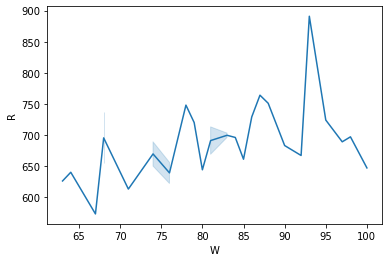

In [67]:
sns.lineplot(x='W',y='R',data=df)

We can observe that the Runs rate is high in the range 640-650 followed by the range 700, so in this range the wins of team is also high. As the run rate increases the rate of wins also increases.



<AxesSubplot:xlabel='W', ylabel='BB'>

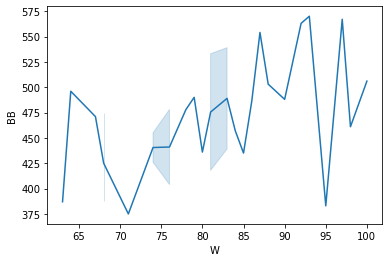

In [68]:
sns.lineplot(x='W',y='BB',data=df)

winning rate of the team increases as the number of Walks increases.

<AxesSubplot:title={'center':'Relation between Doubles and Win'}, xlabel='W', ylabel='2B'>

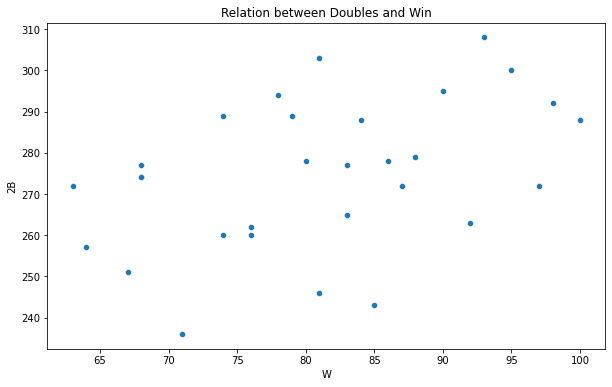

In [69]:
plt.figure(figsize=[10,6])
plt.title('Relation between Doubles and Win')
sns.scatterplot(df['W'],df['2B'],palette="husl")

<AxesSubplot:title={'center':'Relation between Stolen Bases and Win'}, xlabel='W', ylabel='SB'>

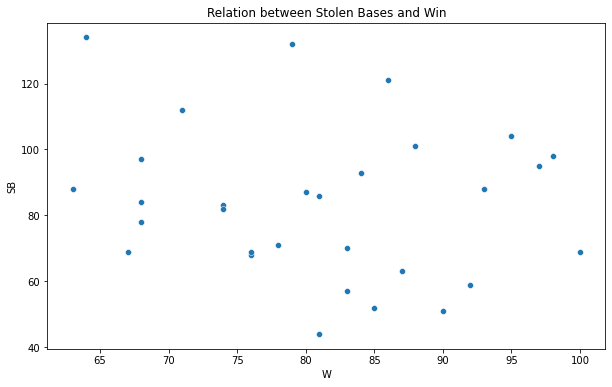

In [71]:
plt.figure(figsize=[10,6])
plt.title('Relation between Stolen Bases and Win')
sns.scatterplot(df['W'],df['SB'],palette="husl")

<AxesSubplot:title={'center':'Relation between Runs Allowed and Wins'}, xlabel='W', ylabel='RA'>

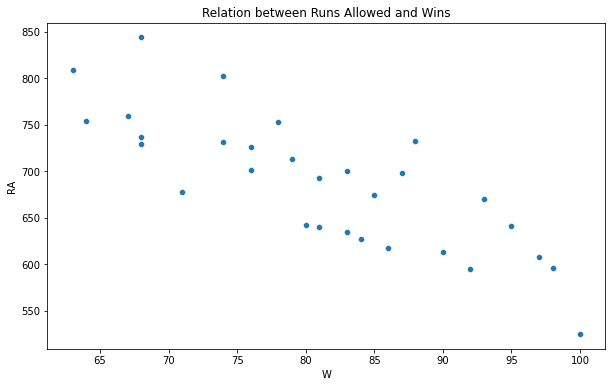

In [72]:
plt.figure(figsize=[10,6])
plt.title('Relation between Runs Allowed and Wins')
sns.scatterplot(df['W'],df['RA'],palette="husl")

<AxesSubplot:title={'center':'Relation between Earned Runs and Wins'}, xlabel='W', ylabel='ER'>

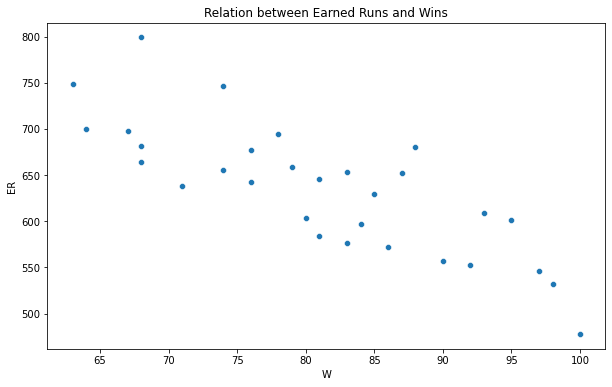

In [73]:
plt.figure(figsize=[10,6])
plt.title('Relation between Earned Runs and Wins')
sns.scatterplot(df['W'],df['ER'],palette="husl")

As the ER decreases, the winning rate also decreases.

<AxesSubplot:title={'center':'Relation between Earned Runs Avergae and Wins'}, xlabel='W', ylabel='ERA'>

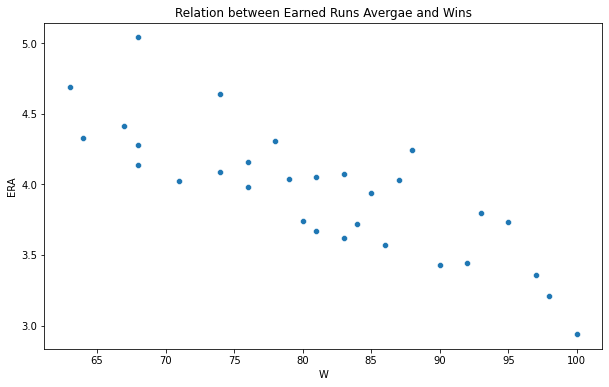

In [74]:
plt.figure(figsize=[10,6])
plt.title('Relation between Earned Runs Avergae and Wins')
sns.scatterplot(df['W'],df['ERA'],palette="husl")

As the ERA decreases Wins rate also decreases

<AxesSubplot:title={'center':'Relation between Earned Runs Avergae and Earned Runs'}, xlabel='ER', ylabel='ERA'>

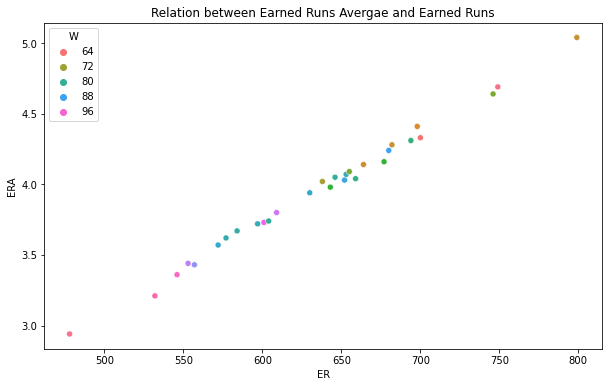

In [75]:
plt.figure(figsize=[10,6])
plt.title('Relation between Earned Runs Avergae and Earned Runs')
sns.scatterplot(df['ER'],df['ERA'],df['W'],palette="husl")

As the Earned Runs increases, Earned Runs Average also increases.

<AxesSubplot:title={'center':'Relation between Save and Wins'}, xlabel='SV', ylabel='W'>

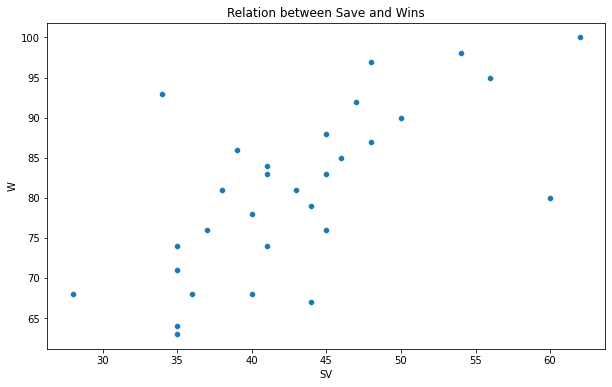

In [77]:
plt.figure(figsize=[10,6])
plt.title('Relation between Save and Wins')
sns.scatterplot(df['SV'],df['W'],palette="husl")

As the Saves increases the wins of the team also increases.

<AxesSubplot:title={'center':'Relation between ShoutOuts and Wins'}, xlabel='SHO', ylabel='W'>

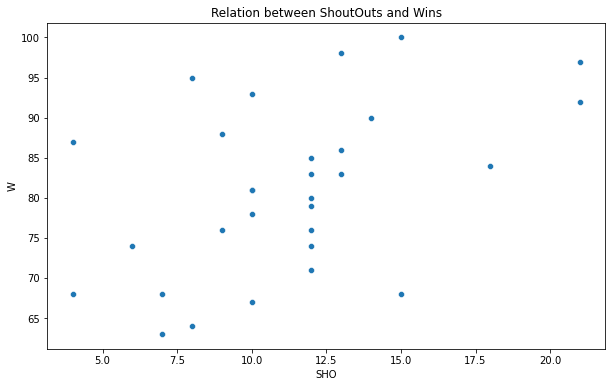

In [78]:
plt.figure(figsize=[10,6])
plt.title('Relation between ShoutOuts and Wins')
sns.scatterplot(df['SHO'],df['W'],palette="husl")

<AxesSubplot:title={'center':'Relation between Complete Games and Wins'}, xlabel='CG', ylabel='W'>

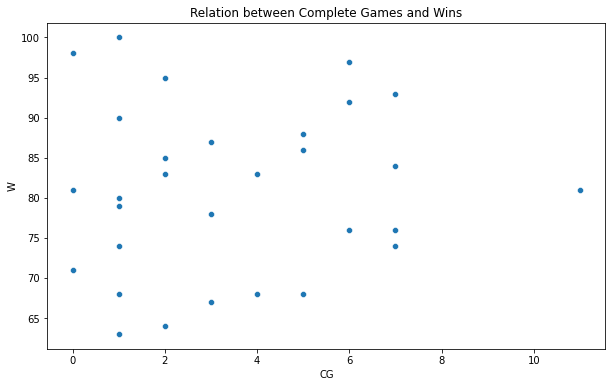

In [79]:
plt.figure(figsize=[10,6])
plt.title('Relation between Complete Games and Wins')
sns.scatterplot(df['CG'],df['W'],palette="husl")

<AxesSubplot:title={'center':'Relation between Triples and Wins'}, xlabel='3B', ylabel='W'>

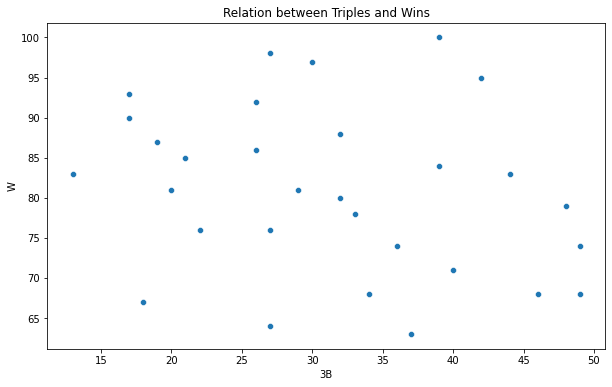

In [80]:
plt.figure(figsize=[10,6])
plt.title('Relation between Triples and Wins')
sns.scatterplot(df['3B'],df['W'],palette="husl")

<AxesSubplot:title={'center':'Relation between Errors and Wins'}, xlabel='E', ylabel='W'>

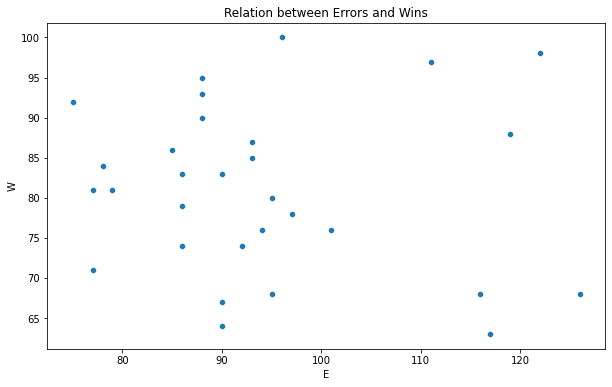

In [81]:
plt.figure(figsize=[10,6])
plt.title('Relation between Errors and Wins')
sns.scatterplot(df['E'],df['W'],palette="husl")

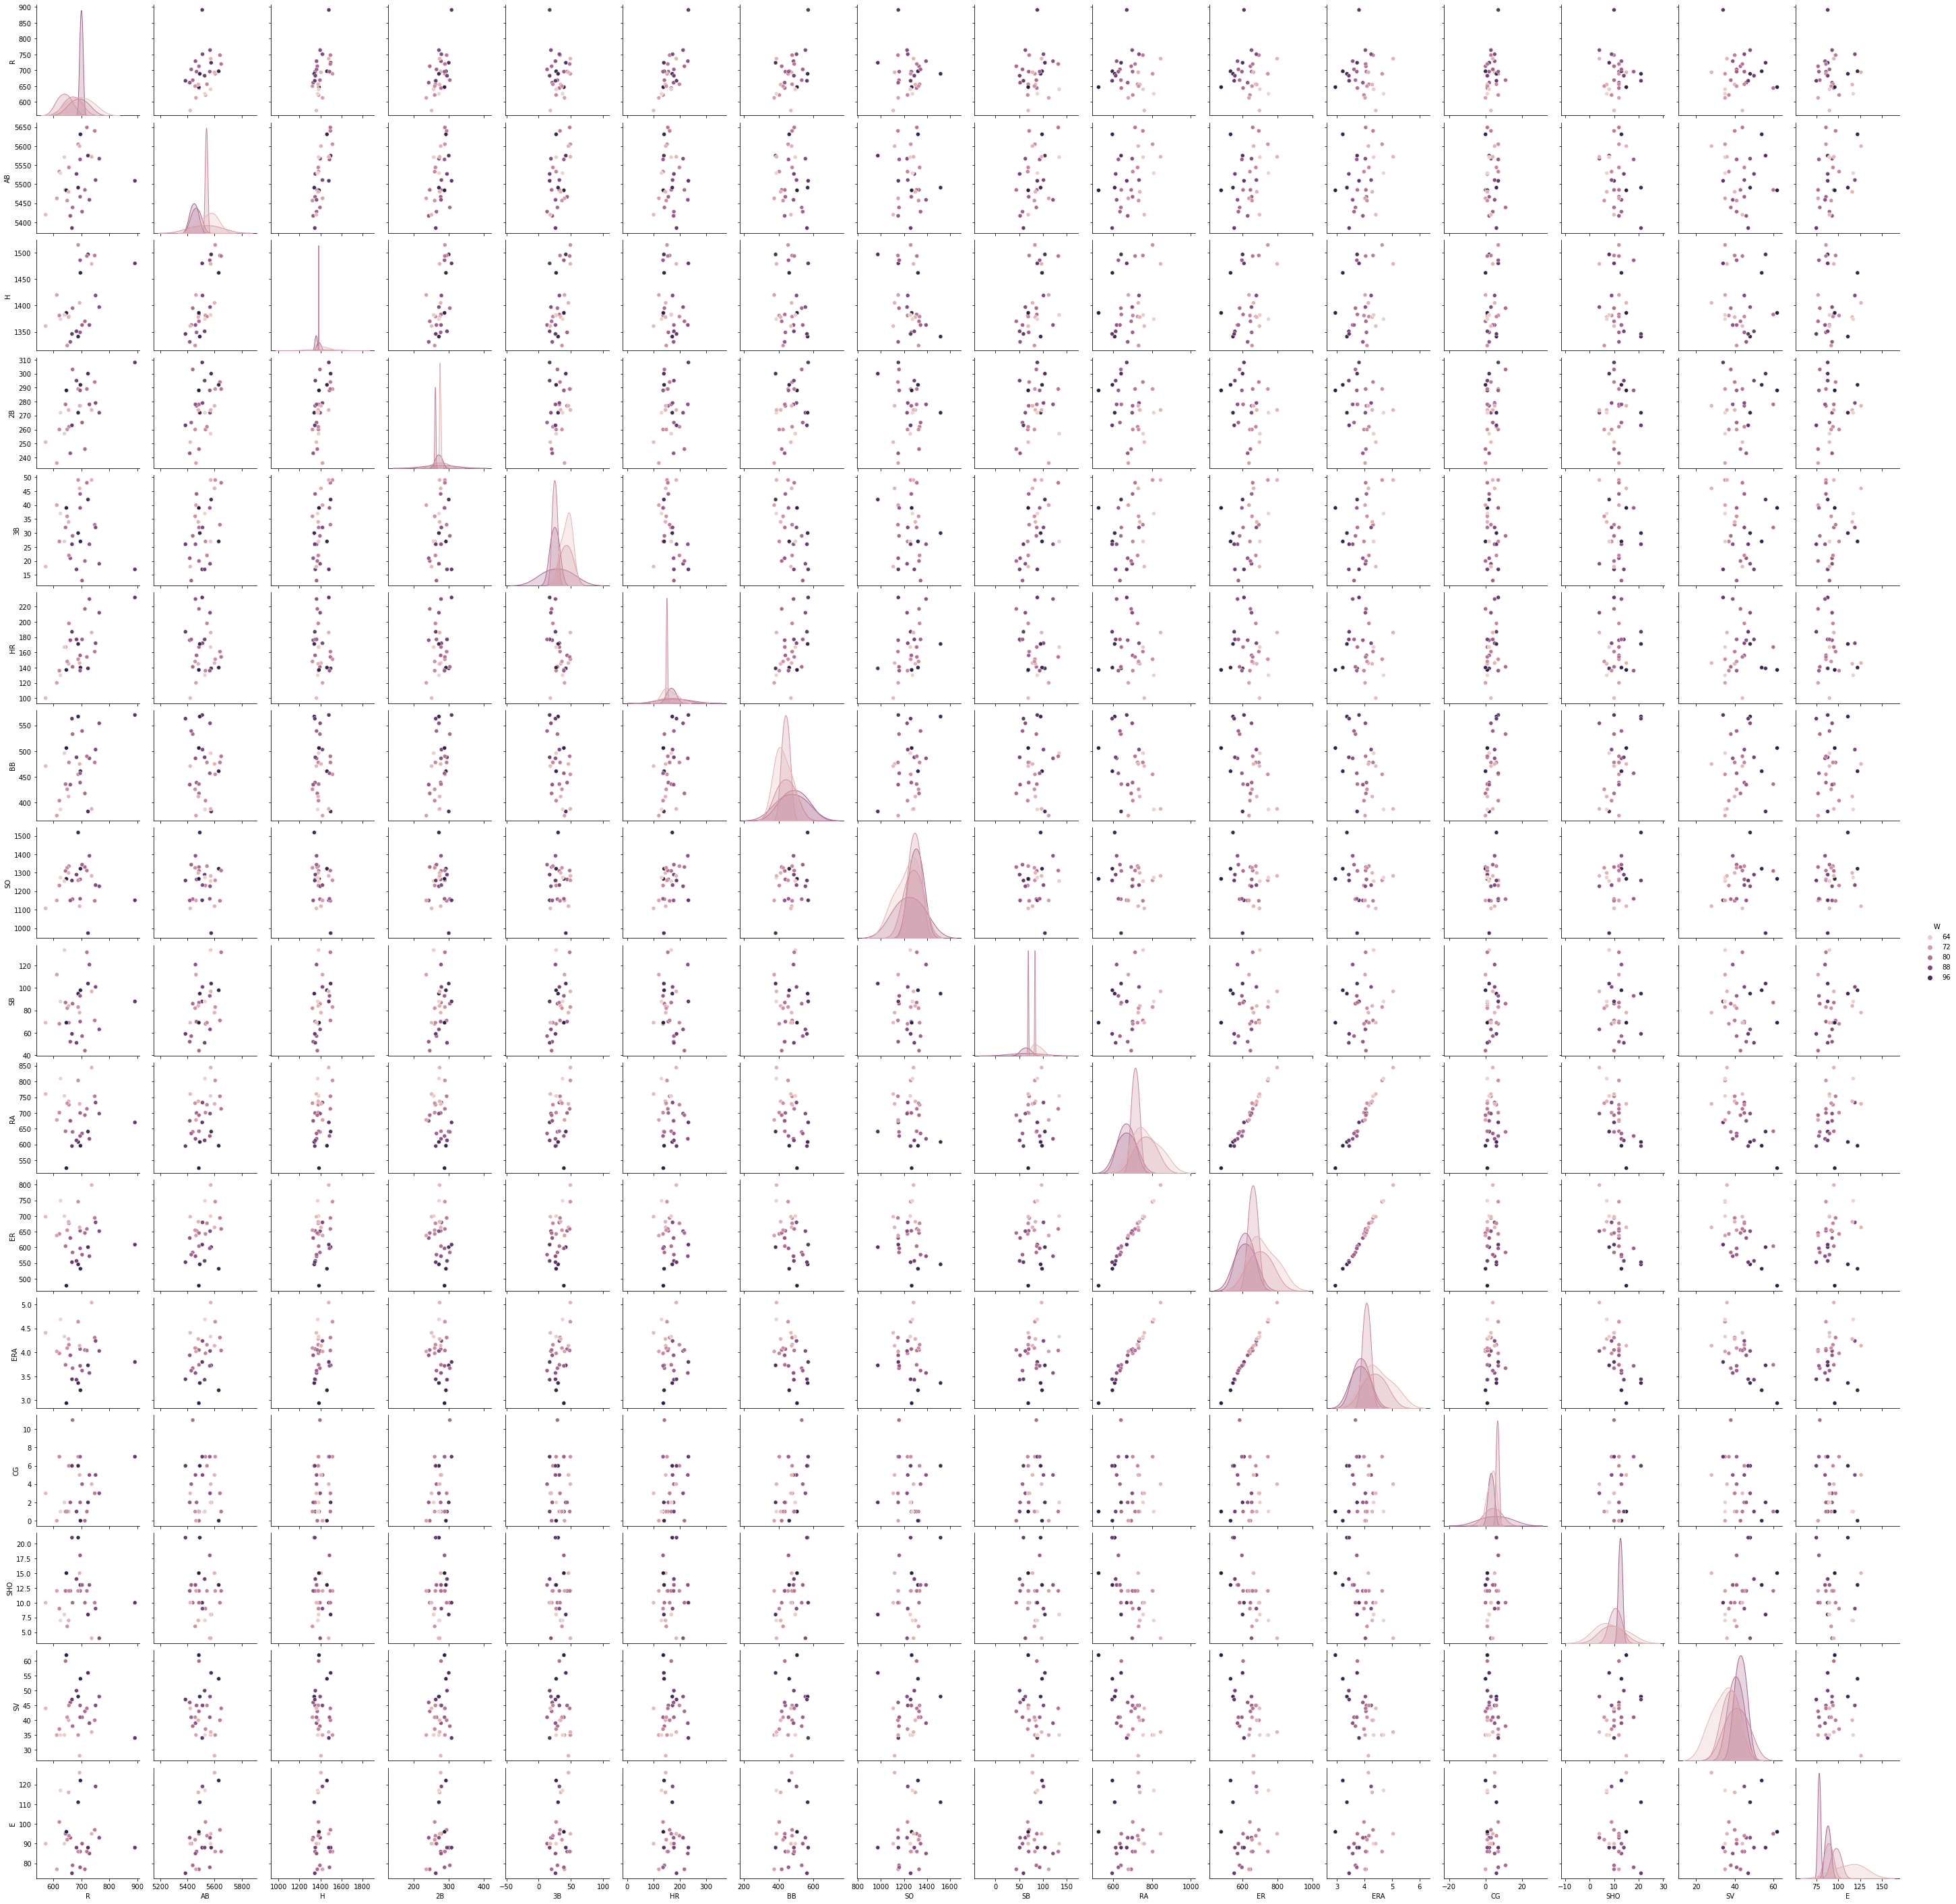

In [82]:
sns.pairplot(df,hue='W')

# Removing outliers

# Zscore method

In [83]:
# Features containing outliers
features = df[["R","ERA","SHO","SV","E"]]

In [84]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.61907797, 0.50695519, 0.81462859, 1.67160651, 0.46146963],
       [0.13443166, 0.25459752, 0.1728    , 0.24987932, 0.60719689],
       [0.33290586, 0.64134684, 0.32091429, 0.65485616, 1.11724227],
       [1.14641931, 0.05301004, 0.56777144, 0.78410408, 0.48575751],
       [0.01327008, 1.53131824, 0.1728    , 1.04259994, 0.60719689],
       [3.50964704, 0.35016492, 0.32091429, 1.17184786, 0.46146963],
       [1.31142984, 0.16500309, 1.80205719, 0.6376231 , 0.0971515 ],
       [0.4286812 , 0.20980031, 0.32091429, 0.00861653, 1.26296953],
       [0.76562578, 0.48455658, 0.1728    , 2.18859821, 0.04857575],
       [1.03448909, 0.79216414, 0.32091429, 0.39636031, 0.194303  ],
       [1.08641548, 0.63537388, 0.56777144, 0.24987932, 1.79730279],
       [0.70562195, 0.86533293, 0.41965715, 0.52560823, 0.68006051],
       [0.47137623, 0.03658439, 0.1728    , 0.37912725, 0.0971515 ],
       [0.55792022, 0.45618501, 0.1728    , 0.24987932, 0.02428788],
       [0.09981406, 0.41138779, 0.

#### Now we have removed the outliers.

In [85]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [86]:
df.shape

(30, 17)

The old dataset contains 30 rows and 17 columns.

In [87]:
new_df.shape

(29, 17)

The new dataset contains 29 rows and 17 columns.

# Percentage of Dataloss

In [88]:
# Checking the the data loss
data_loss = (30-29)/30*100
data_loss

3.3333333333333335

### percentage of Dataloss is 3.33%

# Checking for skewness

In [89]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

### The skewness present in the columns "H", "CG", "SHO", "SV" and "E".

## Removing Skewness using yeo-johnson method

In [90]:
skewed_features = ["CG", "SHO", "SV", "E"]

In [93]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [94]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,CG,SHO,SV,E
0,-0.307098,-0.787002,1.532753,-0.348265
1,-0.307098,0.236737,0.312020,-0.540820
2,2.011315,-0.252844,-0.664137,-1.326125
3,1.264463,-0.513555,-0.820689,0.650818
4,1.264463,0.236737,-1.149165,-0.540820


In [95]:
new_df['H'] = np.log(new_df['H'])

In [96]:
# Now let's check the skewness after using the transformation
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738423
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Now the skewness has been removed.

# Correlation:

In [98]:
new_df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.020787,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.481626,0.756713,-0.079633
R,0.390451,1.000000,0.438022,0.432235,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.113640,0.083261,0.039865
AB,-0.085780,0.438022,1.000000,0.770155,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.194219,-0.147964,0.332002
H,-0.020787,0.432235,0.770155,1.000000,0.527354,0.579733,-0.219201,-0.221773,-0.373302,0.420201,0.243639,0.279955,0.255885,0.071667,-0.129966,-0.103112,-0.020046
2B,0.384886,0.469293,0.490752,0.527354,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088226,0.241326,0.152541
3B,-0.206737,0.134204,0.445604,0.579733,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.066384,-0.269255,0.080498
HR,0.245697,0.586894,-0.064653,-0.219201,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.024448,0.106523,-0.165883
BB,0.447513,0.258450,-0.137850,-0.221773,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.441043,0.207948,-0.056106
SO,0.156469,0.081158,-0.111243,-0.373302,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.204704,0.125572,0.164817
SB,-0.169503,0.075323,0.373674,0.420201,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.100054,-0.195772,0.070527


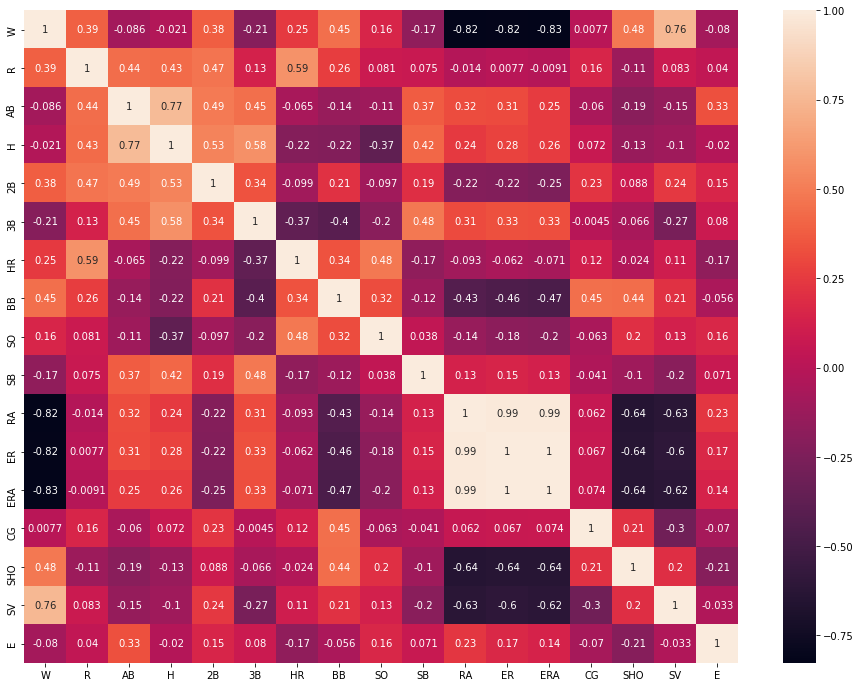

In [99]:
#visualize correlation using heatmap
plt.figure(figsize=(16,12))
sns.heatmap(new_df.corr(), annot=True)
plt.show()

### The target "W" is positively correlated with the features "SV", "SHO", "BB", "HR", "2B", "R" and "SO" .



###  The target "W" is negatively correlated with the features "ERA","ER","RA","E", "SB", "3B" and "AB".

##### The column "H" and "CG" has no correlation with the label, we can drop these columns.

In [100]:
new_df.drop("H", axis=1, inplace=True)
new_df.drop("CG", axis=1, inplace=True)

In [101]:
new_df.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,-0.787002,1.532753,-0.348265
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,0.236737,0.312020,-0.540820
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,-0.252844,-0.664137,-1.326125
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,-0.513555,-0.820689,0.650818
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,0.236737,-1.149165,-0.540820


# Spliting Data into Dependent AND Independent variable:

In [102]:
x = new_df.drop("W", axis=1)
y = new_df["W"]

In [103]:
x.shape

(29, 14)

In [104]:
y.shape

(29,)

# Scaling Data:

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


# Modeling:

##### Finding best random state

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [109]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    model = LinearRegression()
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9097540105382934  on Random_state  104


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=104)

In [111]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Linear Regression

In [112]:
Lr = LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

In [113]:
predLr=Lr.predict(x_test)
print('R2_score:',r2_score(y_test,predLr))

R2_score: 0.9097540105382934


In [114]:
print('MAE:',metrics.mean_absolute_error(y_test, predLr))

MAE: 2.8597181915389394


In [115]:
# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLr))

MSE: 11.932525273270095


In [117]:
# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLr)))

RMSE: 3.454348748066717


##### The R2 score value for Linear Regression model is 90.97%.

# Ridge Regressor

In [119]:
ridge= Ridge()

In [126]:
ridge=Ridge()
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_Score: 0.8871293684595463
MAE: 3.218284652080238
MSE: 14.92400572590444
RMSE: 3.8631600699303723


##### The R2 score for Ridge Regressor is 88.71%.

# Lasso Regressor:

In [127]:
lasso =Lasso()

In [158]:
lasso=Lasso()
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: 0.8328047650206479
MAE: 4.216381358502038
MSE: 22.10692551393655
RMSE: 4.701800241815527


#### The R2 score using Lasso Regressor is 82.28%.

# RandomForestRegressor

In [159]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_rf))
print('MAE:',metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:',metrics.mean_squared_error(y_test, pred_rf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

R2_Score: 0.5589727731092438
MAE: 6.108888888888888
MSE: 58.31359999999999
RMSE: 7.63633419907746


##### The R2 score using RandomForestRegressor is 60.59%.

# DecisionTreeRegressor

In [160]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_dtc))
print('MAE:',metrics.mean_absolute_error(y_test, pred_dtc))
print('MSE:',metrics.mean_squared_error(y_test, pred_dtc))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_dtc)))

R2_Score: -0.16134453781512614
MAE: 10.0
MSE: 153.55555555555554
RMSE: 12.39175353029407


# Checking the cross validation score

In [161]:
# Checking cv score for Linear Regression
print(cross_val_score(Lr,x,y,cv=5).mean())

0.15921112291547787


In [162]:
# Checking cv score for Ridge Regression
print(cross_val_score(ridge,x,y,cv=5).mean())

0.3811417951627042


In [163]:
# Checking cv score for Lasso Regression
print(cross_val_score(lasso,x,y,cv=5).mean())

0.5072274071281608


### From the difference of both R2 score and Cross Validation score we can conclude that Lasso Rgressor as our best fitting model.

# Hyperparameter Tuning

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
# Lasso Regressor
parameters = {'alpha':[0.01, 0.1, 1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

In [166]:
GCV=GridSearchCV(Lasso(),parameters,cv=5)

In [167]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [168]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 4,
 'selection': 'random',
 'tol': 100}

In [169]:
# Creating final model
BaseBall = Lasso(alpha=1.0, fit_intercept="bool", max_iter=2, selection="random", tol=100)
BaseBall.fit(x_train, y_train)
pred = BaseBall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

R2_Score: 83.28047650206479
RMSE value: 4.701800241815527


### After tuning I am getting R2 score as 83.28% for our best model.

# Saving the model

In [170]:
import joblib
joblib.dump(BaseBall,"Datatrained_BaseBall_Case.pkl")

['Datatrained_BaseBall_Case.pkl']

# LOADING THE MODEL

In [171]:
ADS = joblib.load("Datatrained_BaseBall_Case.pkl")

In [172]:
print(ADS.predict(x_test))

[94.79180997 79.5934294  77.1181551  88.52725617 79.85428195 79.3777317
 76.13764691 87.13518808 77.29550994]


# !!! THANK YOU !!!